# Основные концепции Machine Learning. Домашняя работа

In [ ]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
### Здесь требуется загрузить датасет phones.csv ###

In [7]:
phones = pd.read_csv('1.8_phones.csv')
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [ ]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

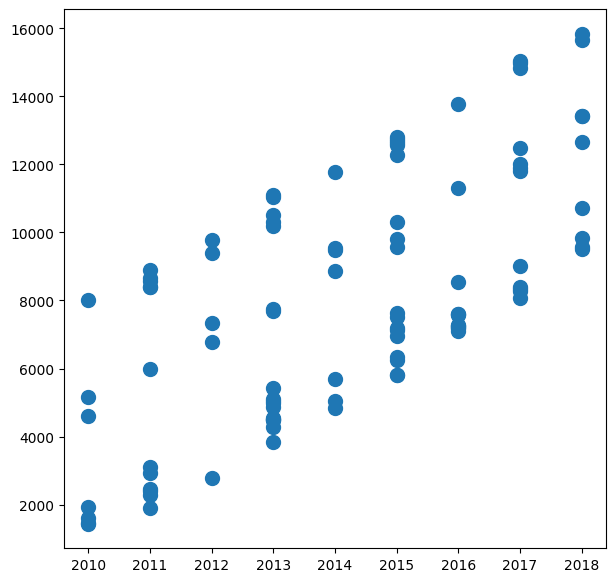

In [41]:
fig = plt.figure(figsize=(7, 7)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)

# отображаем картинку
plt.show()

Задание 1: обучить модель регрессии

In [42]:
from sklearn.linear_model import LinearRegression
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["disk","year"]]
y = phones["price"]

reg = LinearRegression().fit(X, y)

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [43]:
[b] = reg.coef_
a = reg.intercept_

def reg_prediction(dim_1):
    return a + b * dim_1

ValueError: too many values to unpack (expected 1)

In [44]:
reg.predict(X[0:1])[0]

7848.046694419114

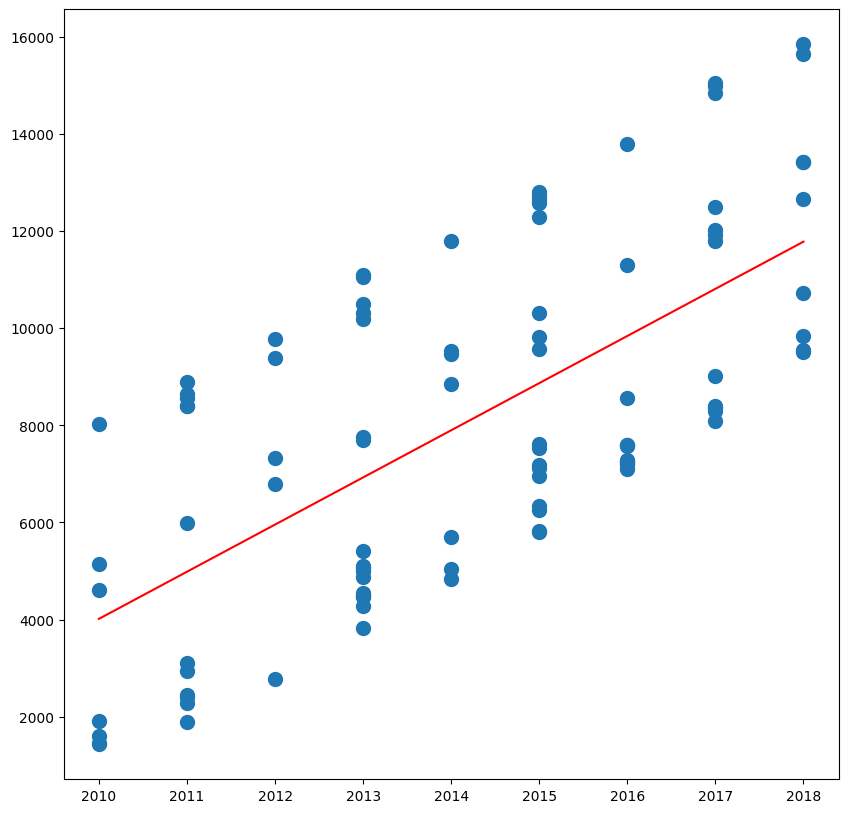

In [45]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)
# помещаем предсказания
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c="red")

# отображаем картинку
plt.show()

Задание 2: обучить модель классификации

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["disk","year"]]
y = phones["os"]

cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [49]:
cl.predict(X[7:8])[0], y[7]

('Android', 'Android')

Задание 3: обучить модель кластеризации

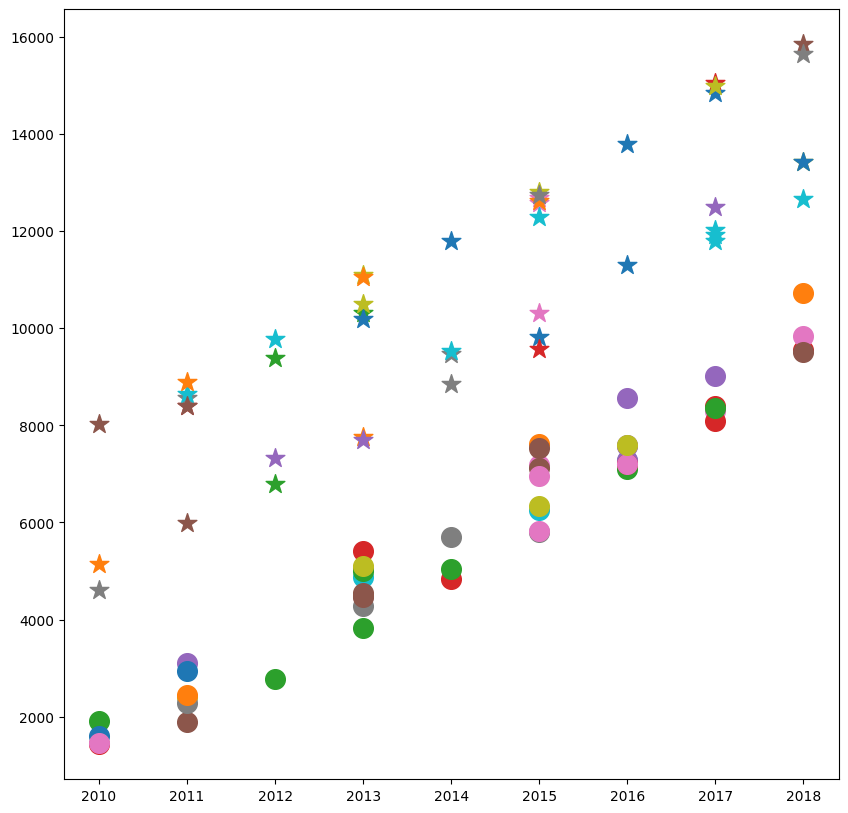

In [85]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "*"}
for d1, d2, l in zip(phones.year, phones.price, phones.os):
    plt.scatter(d1, d2, s=200, marker=markers[l])

# отображаем картинку
plt.show()

In [59]:
from sklearn.cluster import KMeans

In [86]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["year", "price"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
[c1, c2, c3] = clust.cluster_centers_

In [88]:
clust.cluster_centers_

array([[ 2016.20833333, 12896.83333333],
       [ 2012.13333333,  3958.53333333],
       [ 2014.54347826,  8323.32608696]])

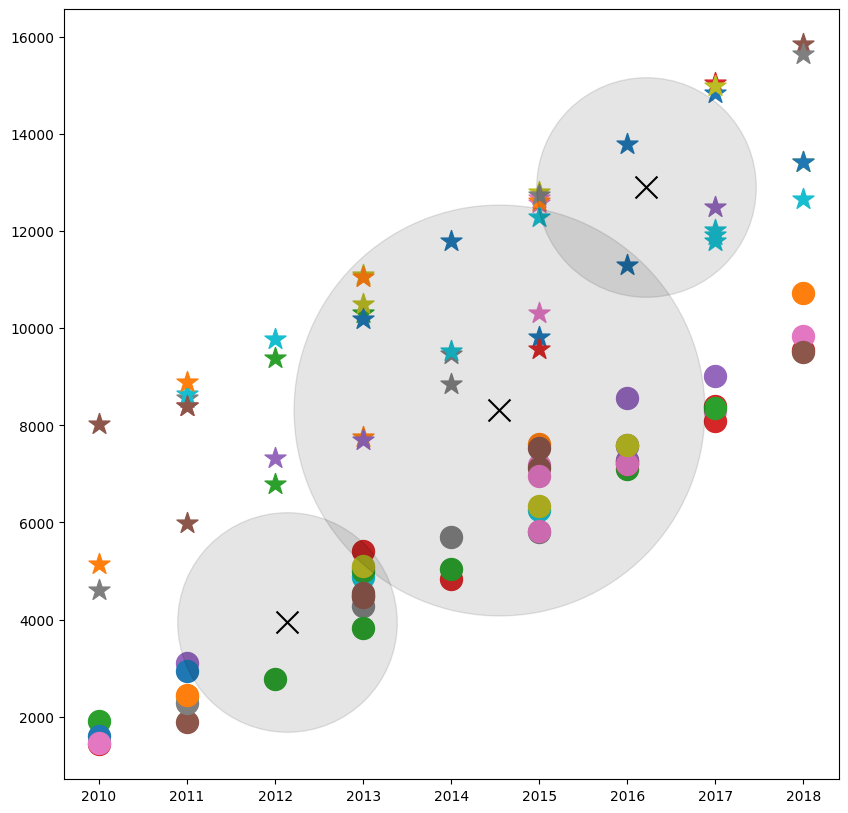

In [89]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "*"}
for d1, d2, l in zip(phones.year, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()